In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.listdir('../RAW_DATA/OFS')

['compte_énergie_ménages_economieV1.xls',
 '.DS_Store',
 'energy_consumption_by_consumers.xls',
 'final_energy_consumption.xls',
 'electricity_production.xls',
 'new_renewables_energy_production.xls',
 'renewables_energy_consumption.xls',
 'compte_énergie_ménages_economie.xls',
 'utilization_rate_nuclear_centrals.xls',
 'Démographie par canton.xlsx',
 'Données démographie suisse.xlsx',
 'energy_importation.xls']

In [3]:
first_row=['','Année','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
raw_df=pd.read_excel(os.path.join('../RAW_DATA/OFS/compte_énergie_ménages_economieV1.xls'),sheetname='T 2.4.12',names=first_row,skip_footer=41,skiprows=6)
raw_df['Agents Énergétiques']=raw_df[''].fillna(method='ffill')
raw_df.drop([''],axis=1,inplace=True)
raw_df.dropna(inplace=True)

In [4]:
df=pd.melt(raw_df,id_vars=['Agents Énergétiques','Année'])
df.columns=['Agent Énergétique','Secteur','Année','Consommation (TJ)']
df

,Agent Énergétique,Secteur,Année,Consommation (TJ)
0,Tous les agents énergétiques,Economie,2000,736203
1,Tous les agents énergétiques,Secteur primaire,2000,15948
2,Tous les agents énergétiques,Secteur secondaire,2000,442714
3,Tous les agents énergétiques,Secteur tertiaire,2000,277541
4,Tous les agents énergétiques,Ménages,2000,364437
5,Tous les agents énergétiques,Transport,2000,128255
6,Tous les agents énergétiques,Chauffage et autres,2000,236182
7,Tous les agents énergétiques,Total,2000,1.1036e+06
8,Pétrole brut,Economie,2000,300
9,Pétrole brut,Secteur primaire,2000,-


In [5]:
def changeinzero(x):
    if x=='-':
        return 0
    else:
        return x

In [6]:
df['Consommation (TJ)']=df['Consommation (TJ)'].map(changeinzero)
df.fillna(0,inplace=True)
df['Année']=(df['Année']).map(int)
df['Agent Énergétique'].unique().tolist()

['Tous les agents énergétiques',
 'Pétrole brut',
 'Huile de chauffage extra-légère',
 'Huile de chauffage moyenne et lourde',
 'Essence',
 'Diesel',
 "Carburants d'aviation",
 'Coke de pétrole',
 'Autres produits pétroliers',
 'Utilisation non énergétique de produits pétroliers',
 'Charbon',
 'Gaz naturel',
 'Ordures et déchets industriels, hors biomasse',
 'Ordures et déchets industriels, de la biomasse',
 'Bois et charbon de bois',
 'Biogaz et biocarburants',
 'Géothermie, chaleur ambiante et énergie solaire thermique',
 'Combustibles nucléaires',
 'Electricité',
 'Chaleur à distance']

In [7]:
df[(df['Secteur']=='Chauffage et autres')&(df['Consommation (TJ)']>200)&(df['Année']==2000)]

,Agent Énergétique,Secteur,Année,Consommation (TJ)
6,Tous les agents énergétiques,Chauffage et autres,2000,236182.071730
22,Huile de chauffage extra-légère,Chauffage et autres,2000,116294.887749
94,Gaz naturel,Chauffage et autres,2000,36420.000000
118,Bois et charbon de bois,Chauffage et autres,2000,17910.000000
134,"Géothermie, chaleur ambiante et énergie solair...",Chauffage et autres,2000,3845.994979
150,Electricité,Chauffage et autres,2000,56616.124688
158,Chaleur à distance,Chauffage et autres,2000,4800.000000


<IPython.core.display.Javascript object>


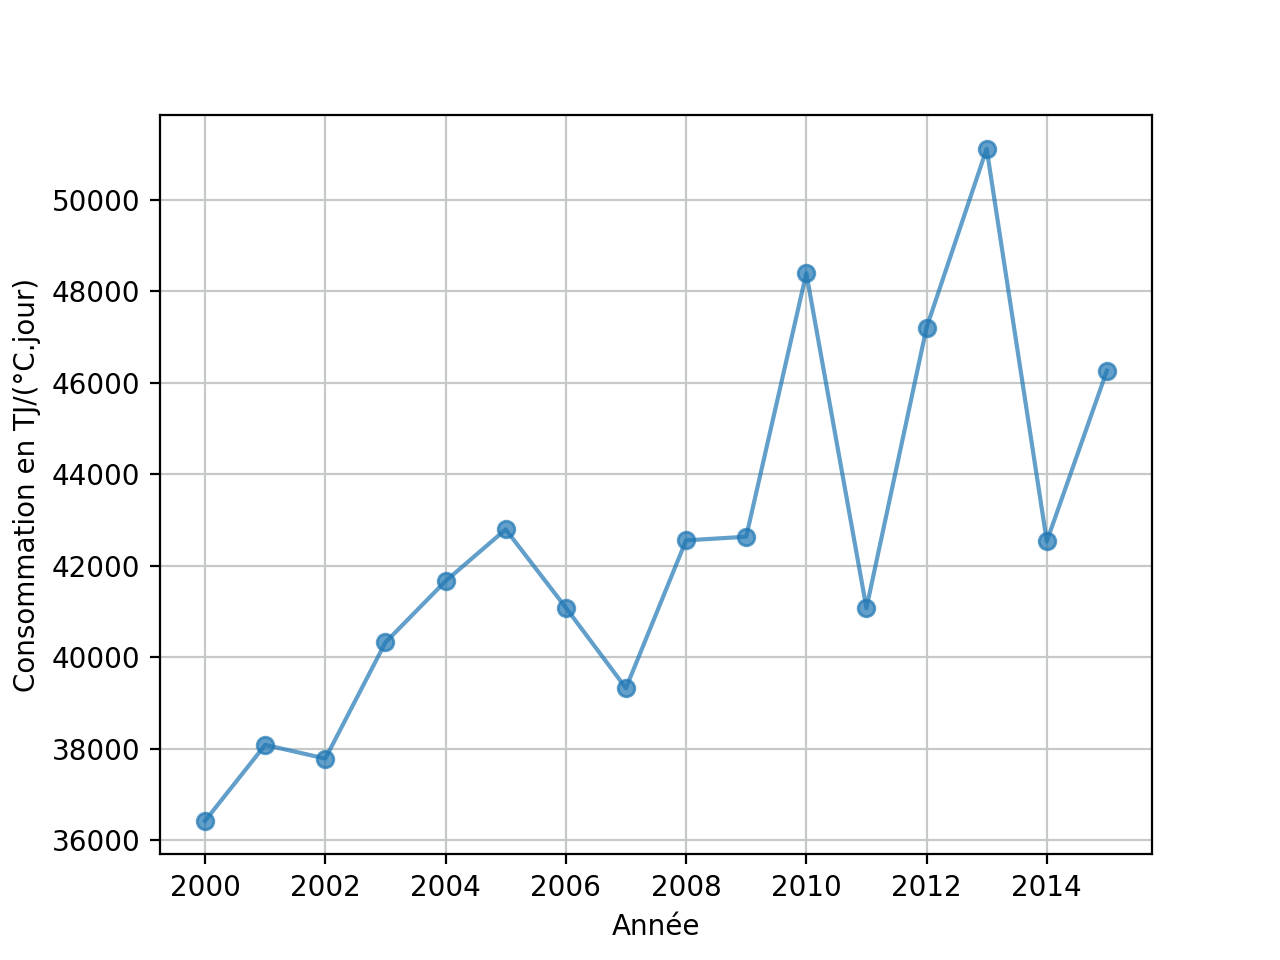

In [31]:
%matplotlib notebook

plt.figure('Évolution de la consommation de géothermie / solaire thermique liée au chauffage des ménages')
plt.plot(df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Géothermie, chaleur ambiante et énergie solaire thermique')]['Année'],df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Gaz naturel')]['Consommation (TJ)'],alpha=0.7,marker='o')
plt.grid(color='xkcd:silver')
plt.ylabel('Consommation en TJ/(°C.jour)')
plt.xlabel('Année')
#plt.axis([2000,2015,0,23])
plt.show()

<IPython.core.display.Javascript object>


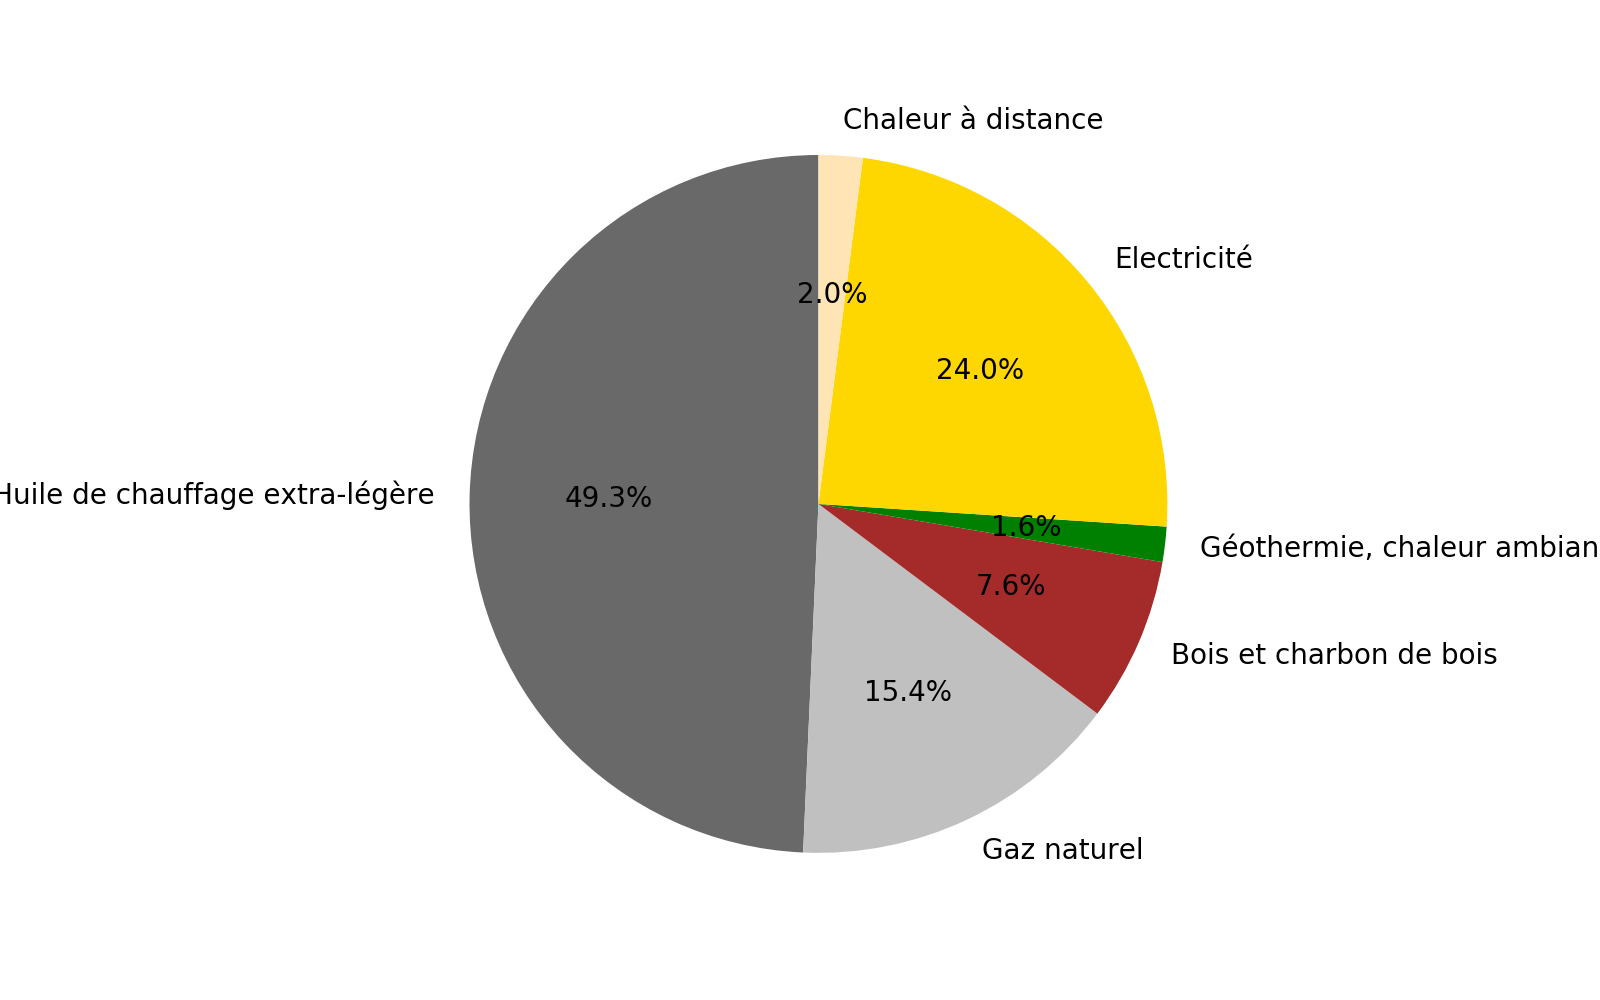

<IPython.core.display.Javascript object>


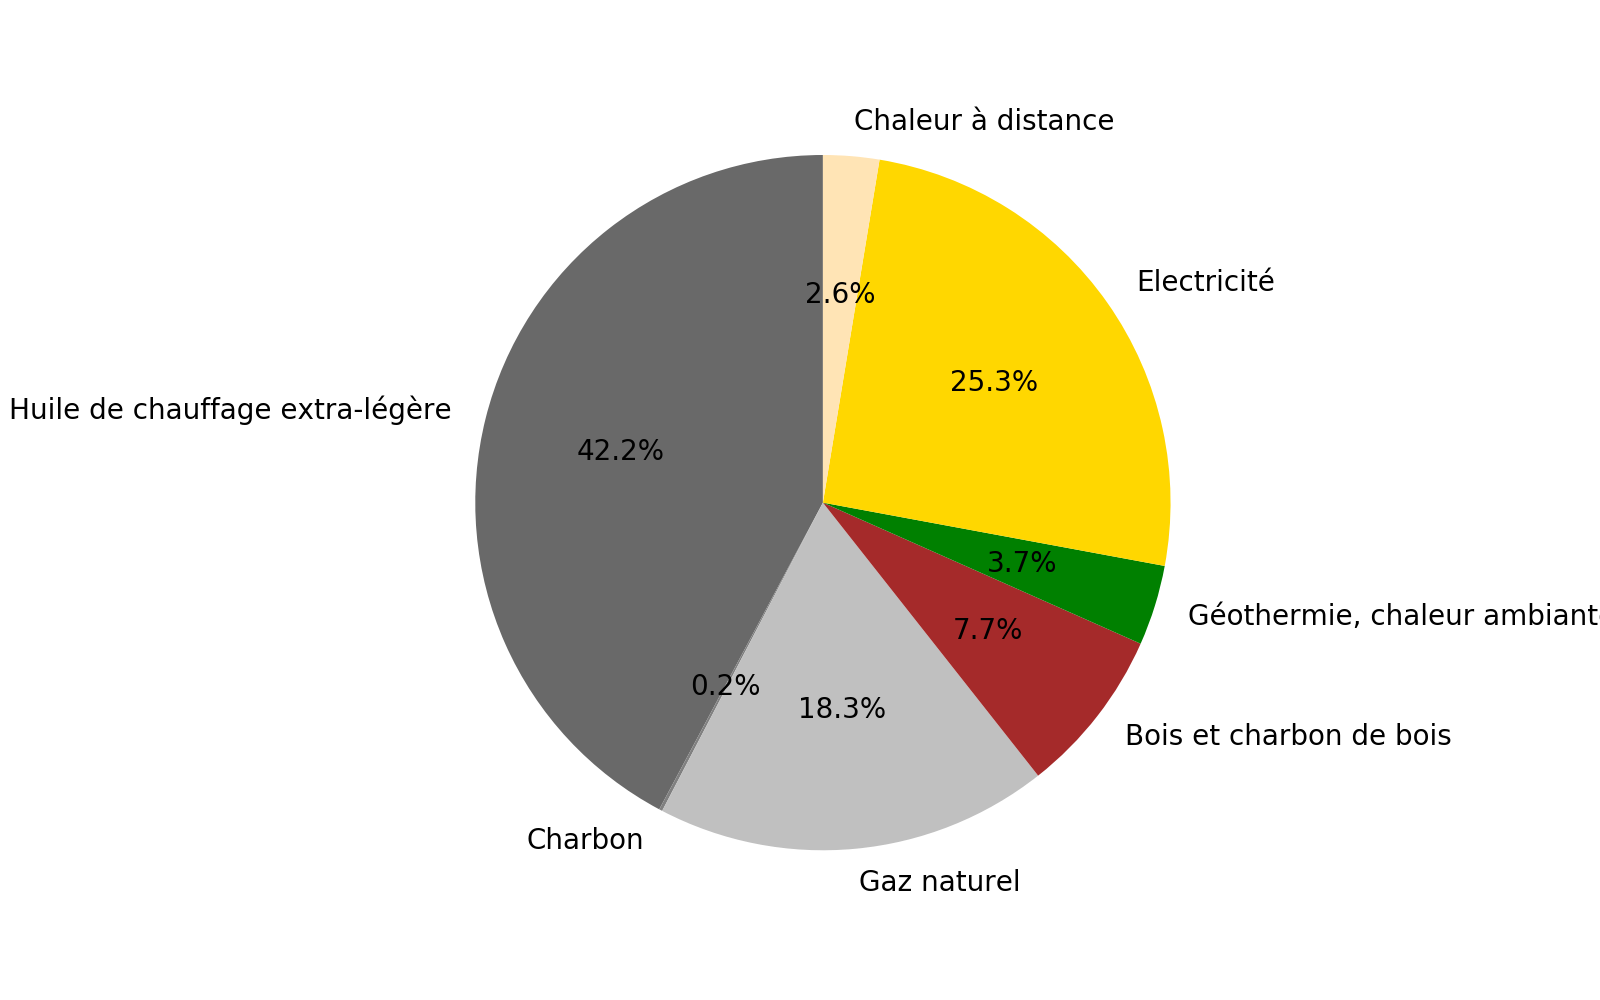

<IPython.core.display.Javascript object>


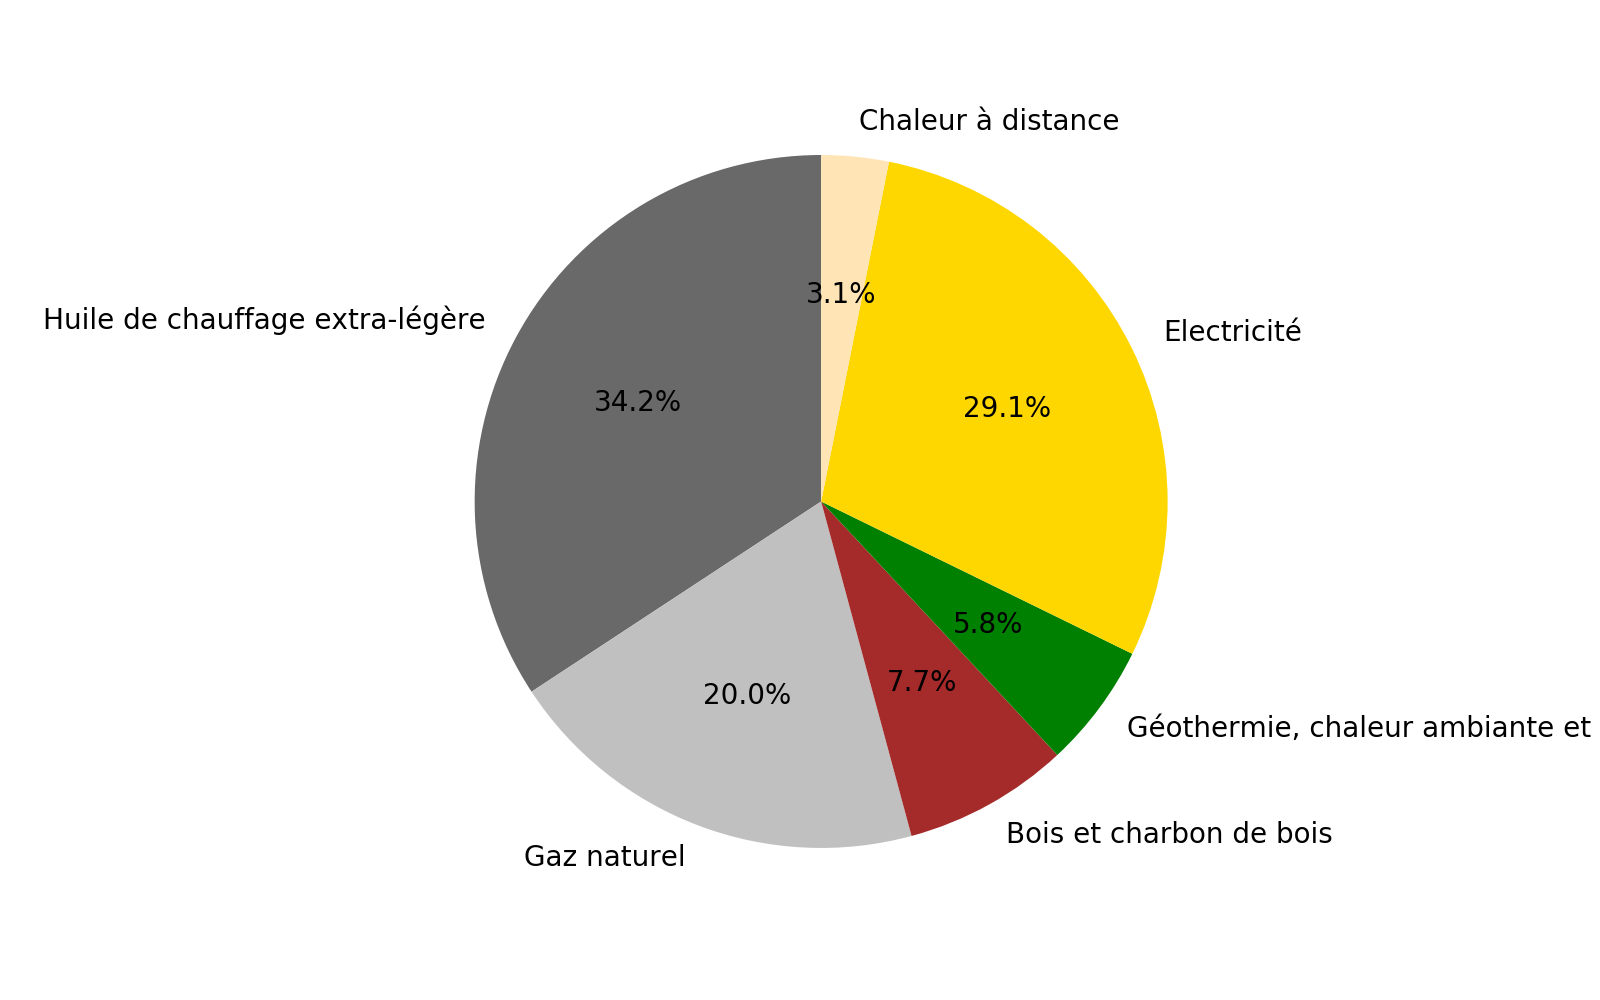

(-1.1072120908045762,
 1.100667977512364,
 -1.1213331122747854,
 1.1010158657107378)

In [29]:
# Part des agents énergétiques dans la consommation d'énergie liée au chauffage des ménages

tot1=df[(df['Secteur']=='Chauffage et autres')&(df['Année']==2000)&(df['Agent Énergétique']!='Tous les agents énergétiques')&(df['Consommation (TJ)']>200)]['Consommation (TJ)'].sum()
labels1=df[(df['Secteur']=='Chauffage et autres')&(df['Année']==2000)&(df['Agent Énergétique']!='Tous les agents énergétiques')&(df['Consommation (TJ)']>200)]['Agent Énergétique']
fracs1=df[(df['Secteur']=='Chauffage et autres')&(df['Année']==2000)&(df['Agent Énergétique']!='Tous les agents énergétiques')&(df['Consommation (TJ)']>200)]['Consommation (TJ)']/tot1     
colors1=['dimgray','silver','brown','green','gold','moccasin']
plt.figure('Répartition agents énergétiques consommation des ménages en 2000',figsize=(8,5))
plt.pie(fracs1,labels=labels1,startangle=90,colors=colors1,autopct='%.1f%%')
plt.axis('equal')

    # 64,7% d'énergies fossiles en 2000

tot2=df[(df['Secteur']=='Chauffage et autres')&(df['Année']==2010)&(df['Agent Énergétique']!='Tous les agents énergétiques')&(df['Consommation (TJ)']>200)]['Consommation (TJ)'].sum()
labels2=df[(df['Secteur']=='Chauffage et autres')&(df['Année']==2010)&(df['Agent Énergétique']!='Tous les agents énergétiques')&(df['Consommation (TJ)']>200)]['Agent Énergétique']
fracs2=df[(df['Secteur']=='Chauffage et autres')&(df['Année']==2010)&(df['Agent Énergétique']!='Tous les agents énergétiques')&(df['Consommation (TJ)']>200)]['Consommation (TJ)']/tot2
colors2=['dimgray','gray','silver','brown','green','gold','moccasin']
plt.figure('Répartition agents énergétiques consommation des ménages en 2010',figsize=(8,5))
plt.pie(fracs2,labels=labels2,startangle=90,colors=colors2,autopct='%.1f%%')
plt.axis('equal')

  #  60,7 % d'énergies fossiles en 2010

tot3=df[(df['Secteur']=='Chauffage et autres')&(df['Année']==2015)&(df['Agent Énergétique']!='Tous les agents énergétiques')&(df['Consommation (TJ)']>200)]['Consommation (TJ)'].sum()
labels3=df[(df['Secteur']=='Chauffage et autres')&(df['Année']==2015)&(df['Agent Énergétique']!='Tous les agents énergétiques')&(df['Consommation (TJ)']>200)]['Agent Énergétique']
fracs3=df[(df['Secteur']=='Chauffage et autres')&(df['Année']==2015)&(df['Agent Énergétique']!='Tous les agents énergétiques')&(df['Consommation (TJ)']>200)]['Consommation (TJ)']/tot3
colors3=['dimgray','silver','brown','green','gold','moccasin']
plt.figure('Répartition agents énergétiques consommation des ménages en 2015',figsize=(8,5))
plt.pie(fracs3,labels=labels3,startangle=90,colors=colors3,autopct='%.1f%%')
plt.axis('equal')

#   54,2 % d'énergies fossiles en 2015

# Baisse de 10,8 % sur les 5 dernières années

In [10]:
df_dj=pd.read_excel(os.path.join('../RAW_DATA/degré.jour_geneve.xlsx'))

In [11]:
df=df.merge(df_dj,how='left')

<IPython.core.display.Javascript object>


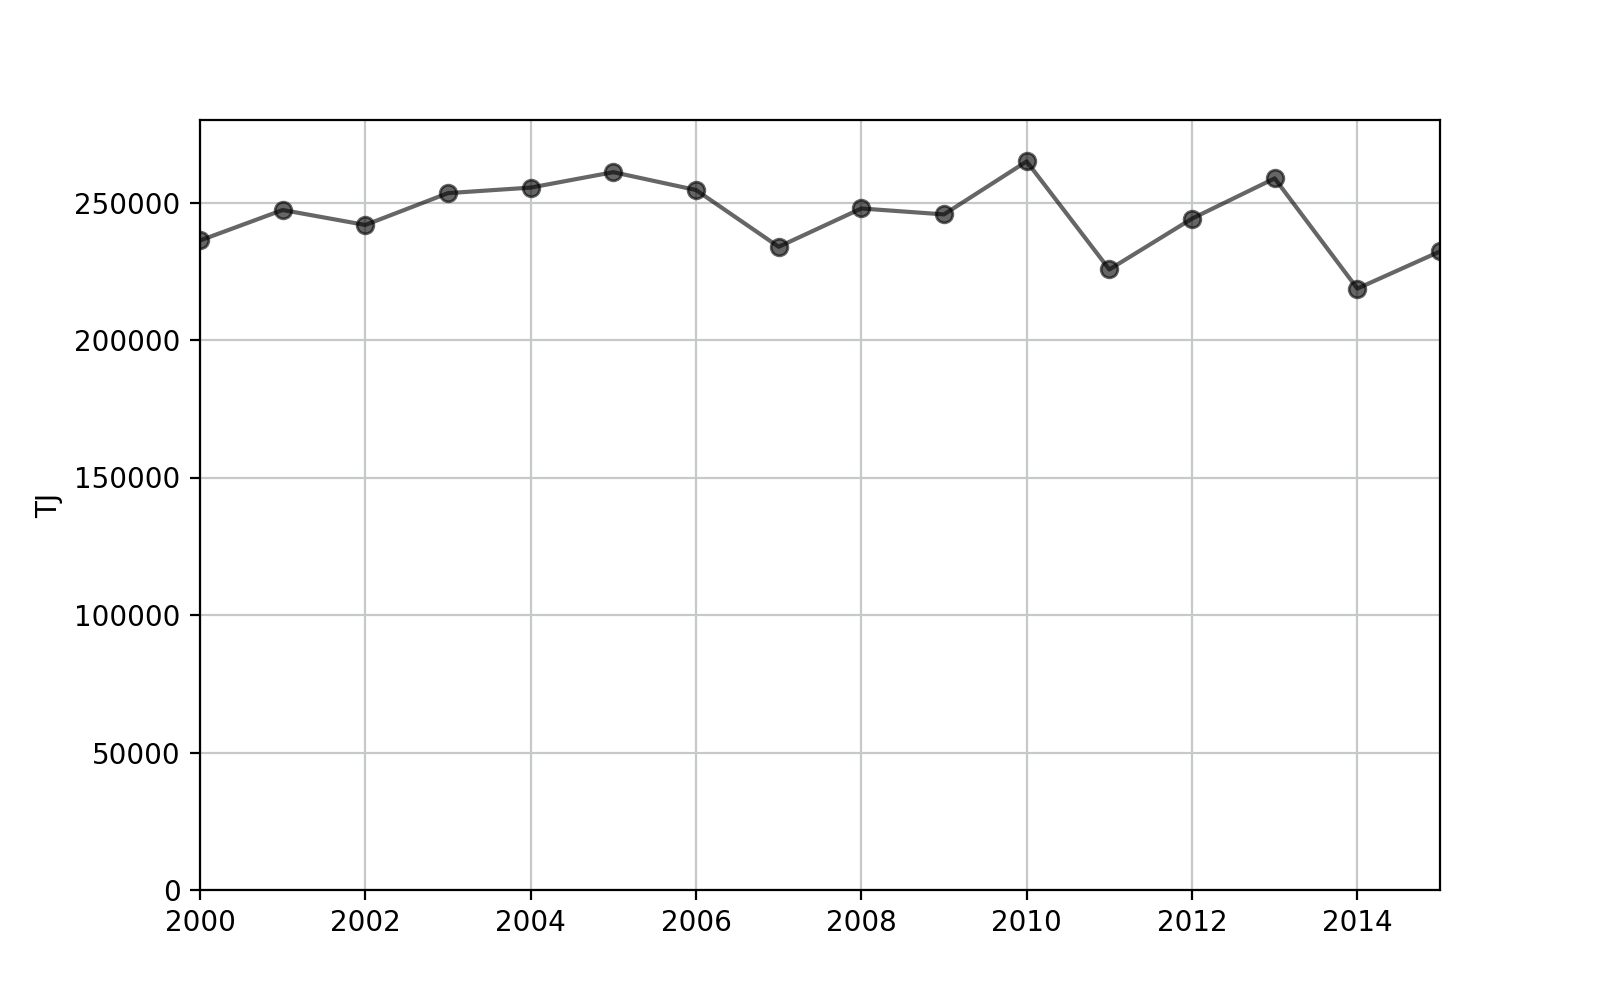

In [30]:
# Consommation d'énergie liée au chauffage des ménages

Y=(df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Tous les agents énergétiques')]['Consommation (TJ)'])
X=df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Tous les agents énergétiques')]['Année']
plt.figure('Consommation tous agents liée au chauffage',figsize=(8,5))
plt.plot(X,Y,color='black',marker='o',alpha=0.6)
plt.grid(color='xkcd:silver')
plt.axis([2000,2015,0,280000])
plt.ylabel('TJ')

In [13]:
pop=pd.read_excel(os.path.join('../RAW_DATA/OFS/Données démographie suisse.xlsx'),header=2)
pop=pop.loc[[3],:]
pop=pop.drop(pop.columns[:11],axis=1)
pop=pop.T
pop.reset_index(inplace=True)
pop.columns=['Année','Population']
df=df.merge(pop)

<IPython.core.display.Javascript object>


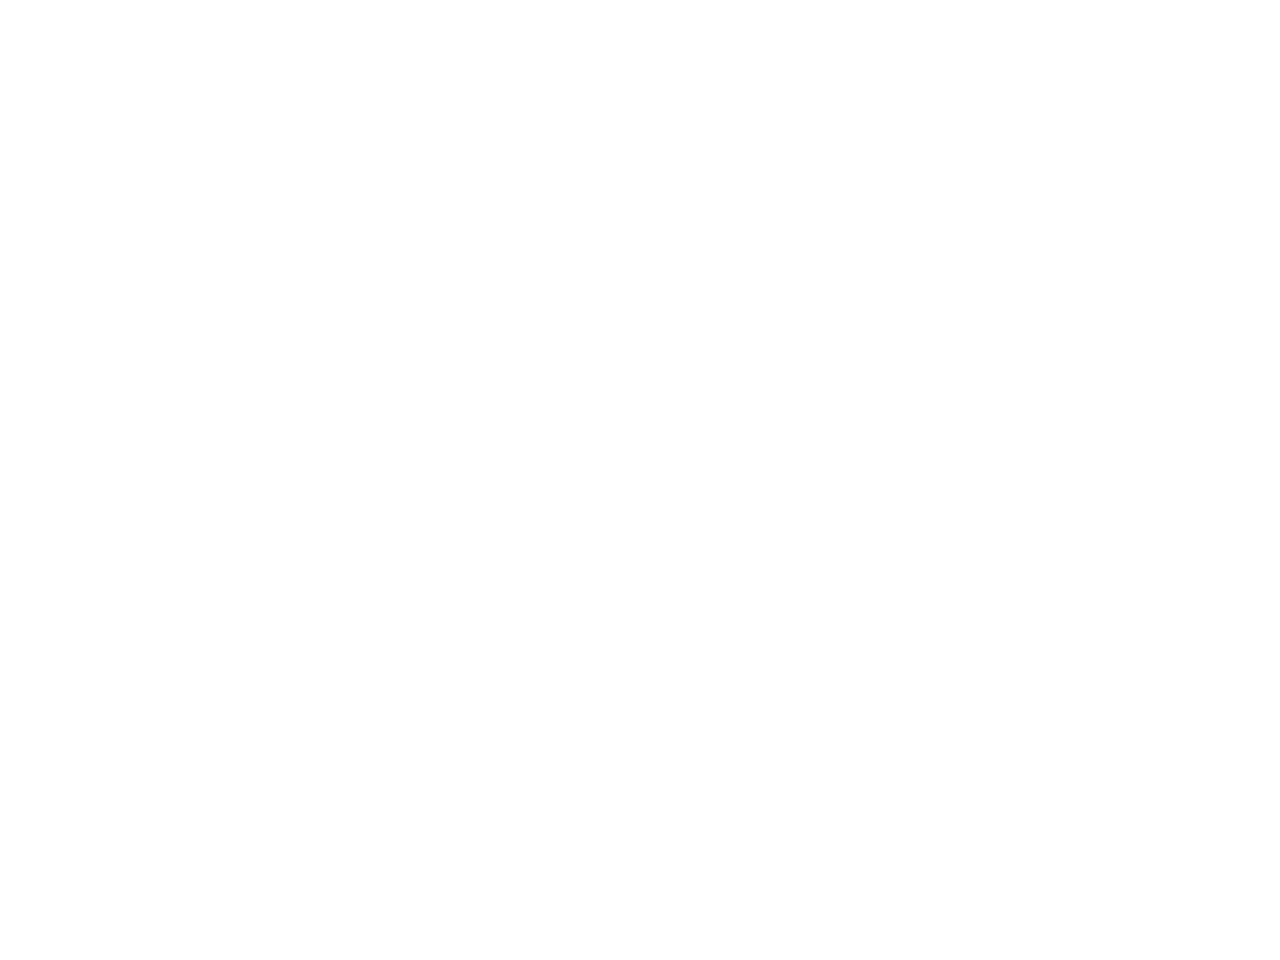

In [14]:
# Consommation de chaleur des ménages par degré.jour par habitant

Y1=df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Tous les agents énergétiques')]['Consommation (TJ)']/(100*df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Tous les agents énergétiques')]['Population'])     
Y2=16*[0.063]
X=df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Tous les agents énergétiques')]['Année']
plt.figure('Consommation de chauffage par habitant')
plt.plot(X,Y1,color='black',marker='o',alpha=0.6)
plt.plot(X,Y2,color='r',linestyle='--')
plt.grid(color='xkcd:silver')
plt.axis([2000,2015,0,0.5])
plt.ylabel('TJ / hab')


In [15]:
Ag=df['Agent Énergétique'].unique().tolist()

In [16]:
# Création DataFrame Rendement

r={'Bois et charbon de bois':[0.9],'Huile de chauffage extra-légère':[0.85],'Charbon':[0.8],'Gaz naturel':[0.9],'Electricité':[0.1],'Géothermie, chaleur ambiante et énergie solaire thermique':[0.5],'Chaleur à distance':[0.9],'Charbon':[0.85]}
dr=pd.DataFrame(data=r)
dr=dr.T
dr.reset_index(inplace=True)
dr.columns=['Agent Énergétique','Rendement']
dr

,Agent Énergétique,Rendement
0,Bois et charbon de bois,0.90
1,Chaleur à distance,0.90
2,Charbon,0.85
3,Electricité,0.10
4,Gaz naturel,0.90
5,"Géothermie, chaleur ambiante et énergie solair...",0.50
6,Huile de chauffage extra-légère,0.85


In [17]:
df=df.merge(dr,how='left')

<IPython.core.display.Javascript object>


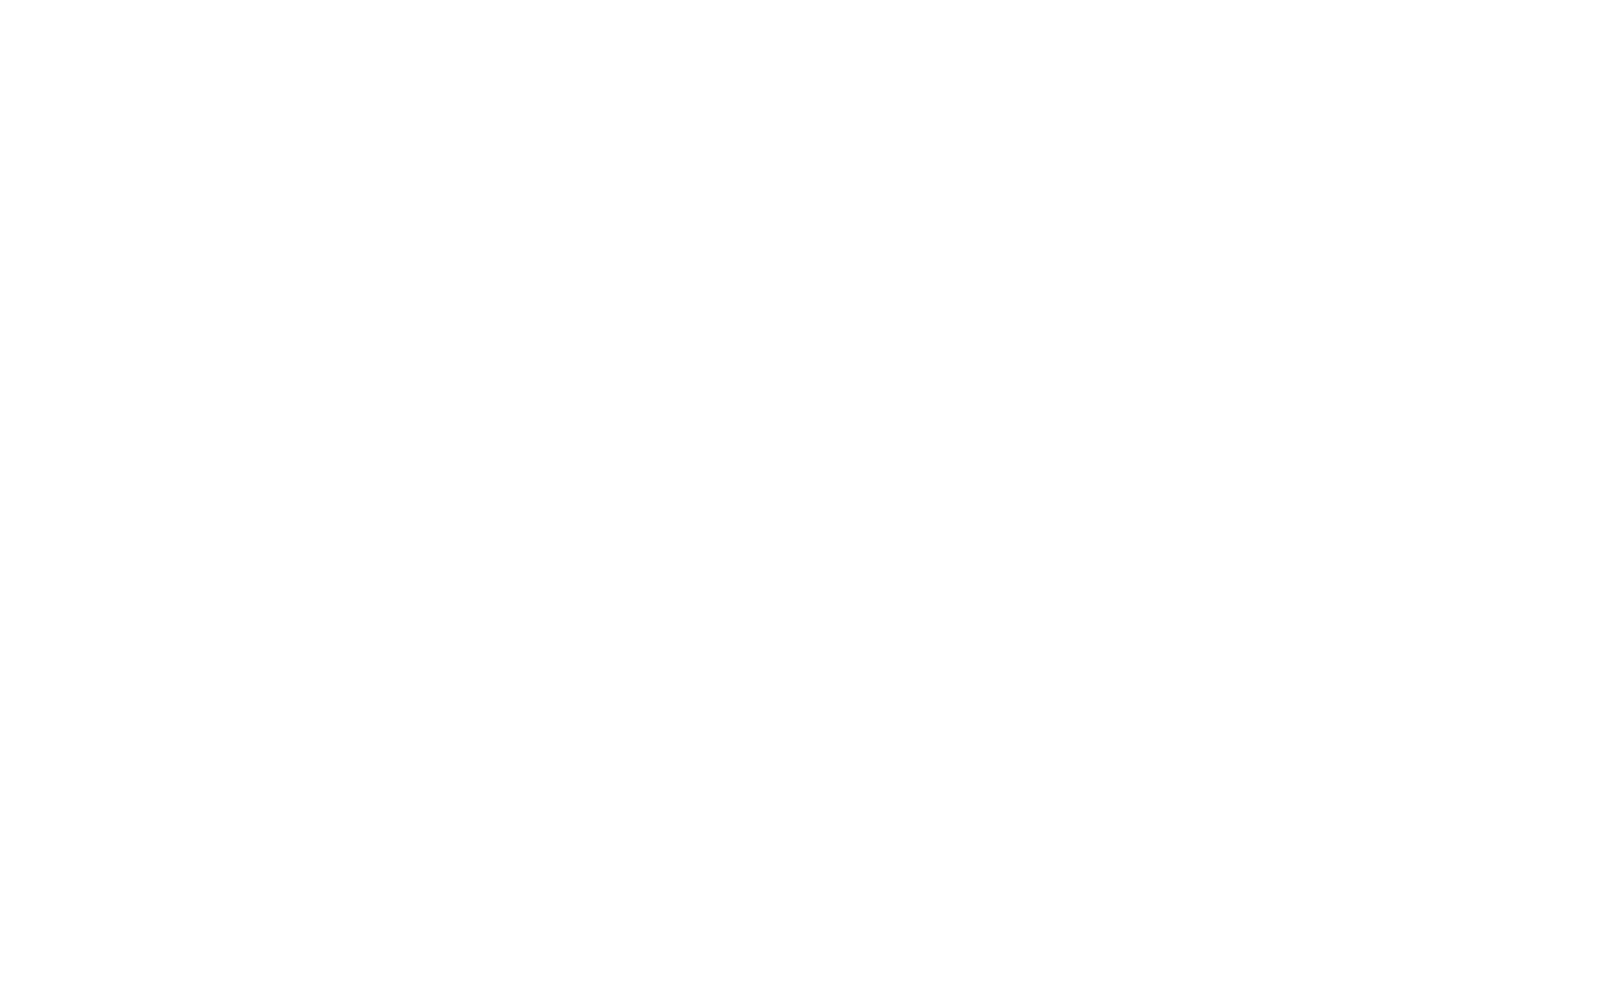

In [18]:
# Évolution des besoins énergétiques 

df['Besoins énergétiques']=df['Consommation (TJ)']*df['Rendement']
Y4=df[(df['Secteur']=='Chauffage et autres')&(df['Consommation (TJ)']>200)].groupby('Année')['Besoins énergétiques'].sum()
Z4=df[(df['Secteur']=='Chauffage et autres')&(df['Consommation (TJ)']>200)].groupby('Année')['Degré.jour'].mean()
Z5=df[(df['Secteur']=='Chauffage et autres')&(df['Consommation (TJ)']>200)].groupby('Année')['Population'].mean()
plt.figure('Évolution des besoins énergétiques des résidents Suisse',figsize=(8,5))
(Y4/(Z4*Z5)).plot(alpha=0.7)
plt.grid(color='xkcd:silver')
plt.axis([2000,2015,0,0.015])
plt.ylabel('TJ/(D.j.hab)')



In [19]:
100*df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Tous les agents énergétiques')]['Population']

6       720400.0
165     725600.0
324     731400.0
483     736400.0
642     741510.2
801     745912.8
960     750873.9
1119    759349.4
1278    770185.6
1437    778580.6
1596    787000.0
1755    795466.2
1914    803906.0
2073    813963.1
2232    823800.0
2391    832700.0
Name: Population, dtype: float64

In [20]:
100*df[(df['Année']==2015)&((df['Secteur']=='Ménages')|(df['Secteur']=='Tertiaire'))].groupby(['Agent Énergétique'])['Consommation (TJ)'].sum()/df[(df['Année']==2015)&(df['Secteur']=='Total')].groupby(['Agent Énergétique'])['Consommation (TJ)'].sum()
                            
                            
                            
                            

Agent Énergétique
Autres produits pétroliers                                    0.000000
Biogaz et biocarburants                                      28.495909
Bois et charbon de bois                                      47.753248
Carburants d'aviation                                         3.336400
Chaleur à distance                                                 NaN
Charbon                                                       3.838772
Coke de pétrole                                               0.000000
Combustibles nucléaires                                       0.000000
Diesel                                                       41.937949
Electricité                                                  28.897826
Essence                                                      85.285117
Gaz naturel                                                  40.847770
Géothermie, chaleur ambiante et énergie solaire thermique    80.593257
Huile de chauffage extra-légère                            

In [21]:
df[(df['Année']==2015)&(df['Agent Énergétique']=='Chaleur à distance')]

,Agent Énergétique,Secteur,Année,Consommation (TJ),Degré.jour,Population,Rendement,Besoins énergétiques
2537,Chaleur à distance,Economie,2015,12950.000000,2409,8327.0,0.9,11655.000000
2538,Chaleur à distance,Secteur primaire,2015,0.423886,2409,8327.0,0.9,0.381497
2539,Chaleur à distance,Secteur secondaire,2015,8801.030121,2409,8327.0,0.9,7920.927109
2540,Chaleur à distance,Secteur tertiaire,2015,4148.545993,2409,8327.0,0.9,3733.691394
2541,Chaleur à distance,Ménages,2015,7270.000000,2409,8327.0,0.9,6543.000000
2542,Chaleur à distance,Transport,2015,0.000000,2409,8327.0,0.9,0.000000
2543,Chaleur à distance,Chauffage et autres,2015,7270.000000,2409,8327.0,0.9,6543.000000


In [22]:
100*df[(df['Année']==2015)&(df['Secteur']=='Chauffage et autres')].groupby(['Agent Énergétique'])['Consommation (TJ)'].sum()/df[(df['Année']==2015)&(df['Secteur']=='Chauffage et autres')].groupby(['Agent Énergétique'])['Consommation (TJ)'].sum()



Agent Énergétique
Autres produits pétroliers                                     NaN
Biogaz et biocarburants                                      100.0
Bois et charbon de bois                                      100.0
Carburants d'aviation                                          NaN
Chaleur à distance                                           100.0
Charbon                                                      100.0
Coke de pétrole                                                NaN
Combustibles nucléaires                                        NaN
Diesel                                                         NaN
Electricité                                                  100.0
Essence                                                      100.0
Gaz naturel                                                  100.0
Géothermie, chaleur ambiante et énergie solaire thermique    100.0
Huile de chauffage extra-légère                              100.0
Huile de chauffage moyenne et lourde        

In [23]:
df[df['Secteur']=='Ménages']

,Agent Énergétique,Secteur,Année,Consommation (TJ),Degré.jour,Population,Rendement,Besoins énergétiques
4,Tous les agents énergétiques,Ménages,2000,364436.912913,2238,7204.0,NaN,NaN
12,Pétrole brut,Ménages,2000,0.000000,2238,7204.0,NaN,NaN
20,Huile de chauffage extra-légère,Ménages,2000,116294.887749,2238,7204.0,0.85,98850.654587
28,Huile de chauffage moyenne et lourde,Ménages,2000,0.000000,2238,7204.0,NaN,NaN
36,Essence,Ménages,2000,114434.444784,2238,7204.0,NaN,NaN
44,Diesel,Ménages,2000,8756.230779,2238,7204.0,NaN,NaN
52,Carburants d'aviation,Ménages,2000,4501.668650,2238,7204.0,NaN,NaN
60,Coke de pétrole,Ménages,2000,0.000000,2238,7204.0,NaN,NaN
68,Autres produits pétroliers,Ménages,2000,0.000000,2238,7204.0,NaN,NaN
76,Utilisation non énergétique de produits pétrol...,Ménages,2000,713.594384,2238,7204.0,NaN,NaN


In [24]:
import plotly.plotly as py
import plotly.graph_objs as go

In [28]:
X=list(range(2000,2051))

y1=df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Charbon')]['Consommation (TJ)']
y2=df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Huile de chauffage extra-légère')]['Consommation (TJ)']
y3=df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Gaz naturel')]['Consommation (TJ)']
y4=df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Electricité')]['Consommation (TJ)']
y5=df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Chaleur à distance')]['Consommation (TJ)']
y6=df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Bois et charbon de bois')]['Consommation (TJ)']
y7=df[(df['Secteur']=='Chauffage et autres')&(df['Agent Énergétique']=='Géothermie, chaleur ambiante et énergie solaire thermique')]['Consommation (TJ)']

y=51*[0.063]

y1_stck=y1
y2_stck=[y1+y2 for y1, y2 in zip(y1, y2)]
y3_stck=[y1+y2+y3 for y1, y2, y3 in zip(y1, y2, y3)]
y4_stck=[y1+y2+y3+y4 for y1, y2, y3, y4 in zip(y1, y2, y3, y4)]
y5_stck=[y1+y2+y3+y4+y5 for y1, y2, y3, y4, y5 in zip(y1, y2, y3, y4, y5)]
y6_stck=[y1+y2+y3+y4+y5+y6 for y1, y2, y3, y4, y5, y6 in zip(y1, y2, y3, y4, y5, y6)]
y7_stck=[y1+y2+y3+y4+y5+y6+y7 for y1, y2, y3, y4, y5, y6, y7 in zip(y1, y2, y3, y4, y5, y6, y7)]

charbon = go.Scatter(
    x = X,
    y = y1_stck,
    mode = 'lines',
    line = dict(width = 0.2),
    name = 'Charbon',
    fill = 'tozeroy'
)

mazout = go.Scatter(
    x = X,
    y = y2_stck,
    mode = 'lines',
    line = dict(width = 0.2, color = 'rgb(100,100,100)'),
    name = 'Mazout',
    fill = 'tonexty'
)

gaz = go.Scatter(
    x = X,
    y = y3_stck,
    mode = 'lines',
    line = dict(width = 0.2, color = 'rgb(200,200,200)'),
    name = 'Gaz',
    fill = 'tonexty'
)

elec = go.Scatter(
    x = X,
    y = y4_stck,
    mode = 'lines',
    line = dict(width = 0.2, color = '#F6F60F'),
    name = 'Électricité',
    fill = 'tonexty'
)

cad = go.Scatter(
    x = X,
    y = y5_stck,
    mode = 'lines',
    line = dict(width = 0.2),
    name = 'CAD',
    fill = 'tonexty'
)

bois = go.Scatter(
    x = X,
    y = y6_stck,
    mode = 'lines',
    line = dict(width = 0.2, color = '#B26633'),
    name = 'Bois',
    fill = 'tonexty'
)

ren = go.Scatter(
    x = X,
    y = y7_stck,
    mode = 'lines',
    line = dict(width = 0.2, color = '#50BD4D'),
    name = 'Renouvelables',
    fill = 'tonexty'
)

st = go.Scatter(
    x = X,
    y = y,
    mode = 'lines',
    line = dict(width = 0.5, color = 'rgb(0,0,0)'),
    name = 'SE 2050'
)

data = [mazout, gaz, elec, cad, bois, ren, st]
layout = go.Layout(
    title = 'Consommation ménage en énergie finale (TJ)',
    legend = dict(x = 1.1, y=0.25),
    xaxis = dict(range=[2000, 2051])
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig,filename='scatter-mode')

In [ ]:
df.to_excel(os.path.join('../RAW_DATA','data_educative_app.xlsx'))